# IoT-ABE Analysis - Encryption runtime

In [1]:
!python3 -m pip install matplotlib
!python3 -m pip install pandas

In [2]:
%pylab inline

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=14.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(18.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [3]:
#go test -timeout 600s github.com/mariusgiger/iot-abe/pkg/crypto -run ^TestEncryptKeyLength$ -v > ./analysis/data/enc_keylen.csv

In [5]:
import pandas as pd
keylen_df = pd.read_csv("./data/enc_keylen.csv")
keylen_df["enc_keylen"] = keylen_df["enc_keylen"] / 1024 #KB
keylen_df["cph_len"] = keylen_df["cph_len"] / 1024 #KB

In [6]:
keylen_df.head()

,attrs,enc_keylen,cph_len
0,1,0.534180,1024.015625
1,2,0.818359,1024.015625
2,3,1.094727,1024.015625
3,4,1.371094,1024.015625
4,5,1.647461,1024.015625


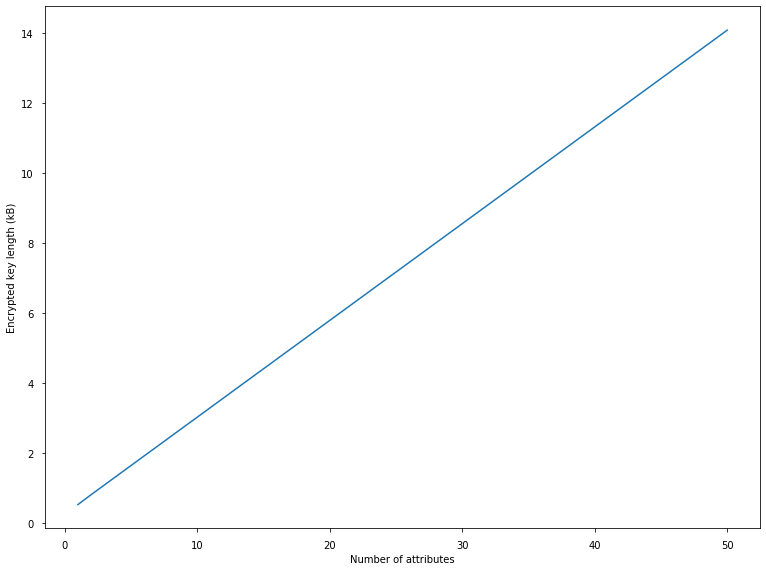

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Encrypted key length (kB)')

plt.plot(keylen_df["attrs"], keylen_df["enc_keylen"])

In [8]:
# go test -run NOTHING -bench=BenchmarkEncryptKeyBytesWithIncreasingPolicyLength -benchmem github.com/mariusgiger/iot-abe/pkg/crypto > ./analysis/data/benchencpollen.csv

In [9]:
skdur_df = pd.read_csv("./data/benchencpollen.csv", sep='\t')
skdur_df.head()

,benchmark,iter,ns/op,B/op,allocs/op
0,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,53813409 ns/op,1057711 B/op,17 allocs/op
1,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,60990892 ns/op,1058016 B/op,17 allocs/op
2,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,75458353 ns/op,1058268 B/op,17 allocs/op
3,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,87595501 ns/op,1058655 B/op,17 allocs/op
4,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,95539044 ns/op,1058917 B/op,17 allocs/op


In [10]:
skdur_df['ns/op'] = skdur_df['ns/op'].str.replace(' ns/op','')
skdur_df['ns/op'] = pd.to_numeric(skdur_df['ns/op'])
skdur_df['B/op'] = skdur_df['B/op'].str.replace(' B/op','')
skdur_df['B/op'] = pd.to_numeric(skdur_df['B/op'])
skdur_df['allocs/op'] = skdur_df['allocs/op'].str.replace(' allocs/op','')
skdur_df['allocs/op'] = pd.to_numeric(skdur_df['allocs/op'])

skdur_df['ms/op'] = skdur_df['ns/op'] / 1e6

skdur_df['attr'] = pd.Series(range(1,51))
skdur_df.head()

,benchmark,iter,ns/op,B/op,allocs/op,ms/op,attr
0,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,53813409,1057711,17,53.813409,1
1,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,60990892,1058016,17,60.990892,2
2,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,75458353,1058268,17,75.458353,3
3,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,87595501,1058655,17,87.595501,4
4,BenchmarkEncryptKeyBytesWithIncreasingPolicyLe...,20,95539044,1058917,17,95.539044,5


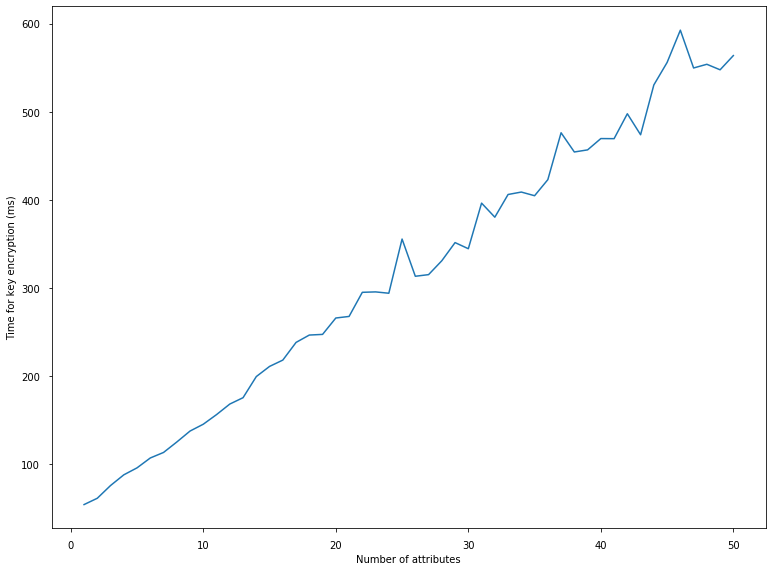

In [11]:
fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Time for key encryption (ms)')

plt.plot(skdur_df["attr"], skdur_df["ms/op"])

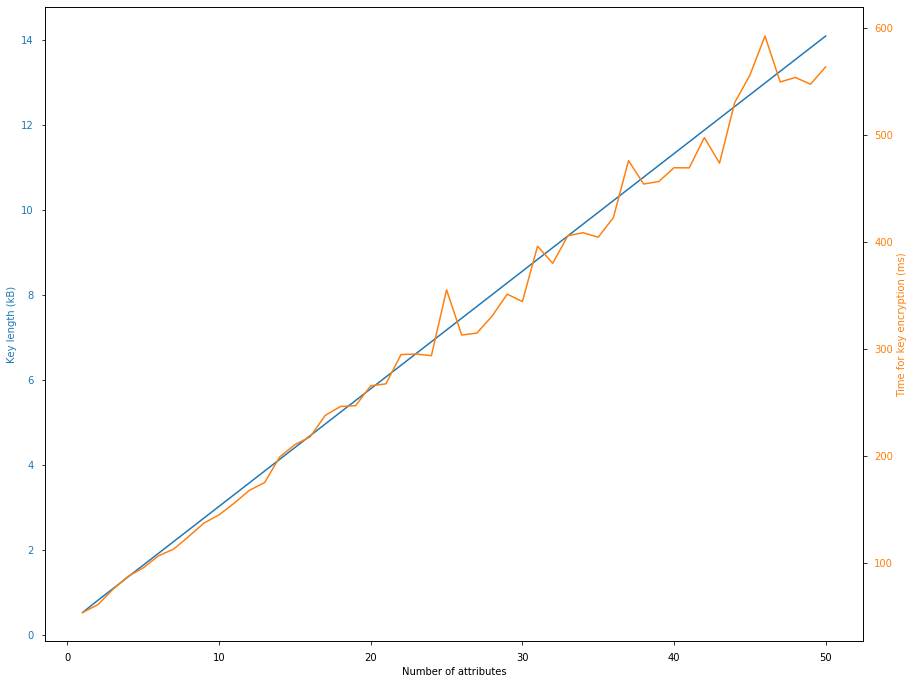

In [12]:
fig, ax1 = plt.subplots(figsize=[12.8, 9.6])

color = 'tab:blue'
ax1.set_xlabel('Number of attributes')
ax1.set_ylabel('Key length (kB)', color=color)
ax1.plot(keylen_df["attrs"], keylen_df["enc_keylen"])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Time for key encryption (ms)', color=color)
ax2.plot(skdur_df["attr"], skdur_df["ms/op"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  

In [13]:
# go test -run NOTHING -bench=BenchmarkEncryptKeyWithIncreasingPolicyLengthNoAES -benchmem github.com/mariusgiger/iot-abe/pkg/crypto > ./analysis/data/benchencpollen_noaes.csv

In [14]:
enc_df = pd.read_csv("./data/benchencpollen_noaes.csv", sep='\t')
enc_df.head()

,benchmark,iter,ns/op,B/op,allocs/op
0,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,30,45307258 ns/op,952 B/op,14 allocs/op
1,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,30,53577244 ns/op,1264 B/op,14 allocs/op
2,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,65924576 ns/op,1532 B/op,14 allocs/op
3,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,77753111 ns/op,1778 B/op,14 allocs/op
4,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,93107723 ns/op,2172 B/op,14 allocs/op


In [15]:
enc_df['ns/op'] = enc_df['ns/op'].str.replace(' ns/op','')
enc_df['ns/op'] = pd.to_numeric(enc_df['ns/op'])
enc_df['B/op'] = enc_df['B/op'].str.replace(' B/op','')
enc_df['B/op'] = pd.to_numeric(enc_df['B/op'])
enc_df['allocs/op'] = enc_df['allocs/op'].str.replace(' allocs/op','')
enc_df['allocs/op'] = pd.to_numeric(enc_df['allocs/op'])

enc_df['ms/op'] = enc_df['ns/op'] / 1e6

enc_df['attr'] = pd.Series(range(1,51))
enc_df.head()

,benchmark,iter,ns/op,B/op,allocs/op,ms/op,attr
0,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,30,45307258,952,14,45.307258,1
1,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,30,53577244,1264,14,53.577244,2
2,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,65924576,1532,14,65.924576,3
3,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,77753111,1778,14,77.753111,4
4,BenchmarkEncryptKeyWithIncreasingPolicyLengthN...,20,93107723,2172,14,93.107723,5


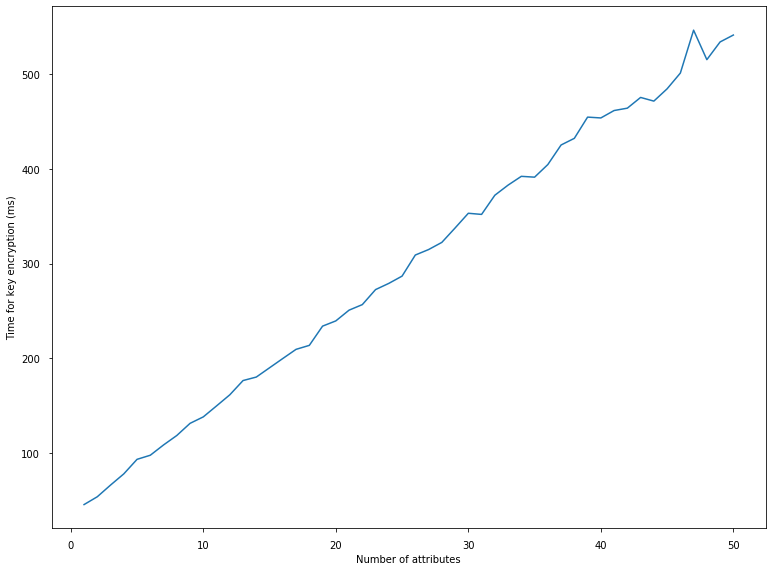

In [16]:
fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Time for key encryption (ms)')

plt.plot(enc_df["attr"], enc_df["ms/op"])

In [17]:
# go test -run NOTHING -bench=BenchmarkDecryptKeyWithIncreasingPolicyLength -benchmem github.com/mariusgiger/iot-abe/pkg/crypto > ./analysis/data/benchdecpollen_noaes.csv

In [18]:
dec_df = pd.read_csv("./data/benchdecpollen_noaes.csv", sep='\t')
dec_df.head()

,benchmark,iter,ns/op,B/op,allocs/op
0,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,100,23877550 ns/op,432 B/op,16 allocs/op
1,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,27436948 ns/op,432 B/op,16 allocs/op
2,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,27937483 ns/op,435 B/op,16 allocs/op
3,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,29779052 ns/op,435 B/op,16 allocs/op
4,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,32440538 ns/op,435 B/op,16 allocs/op


In [19]:
dec_df['ns/op'] = dec_df['ns/op'].str.replace(' ns/op','')
dec_df['ns/op'] = pd.to_numeric(dec_df['ns/op'])
dec_df['B/op'] = dec_df['B/op'].str.replace(' B/op','')
dec_df['B/op'] = pd.to_numeric(dec_df['B/op'])
dec_df['allocs/op'] = dec_df['allocs/op'].str.replace(' allocs/op','')
dec_df['allocs/op'] = pd.to_numeric(dec_df['allocs/op'])

dec_df['ms/op'] = dec_df['ns/op'] / 1e6

dec_df['attr'] = pd.Series(range(1,51))
dec_df.head()

,benchmark,iter,ns/op,B/op,allocs/op,ms/op,attr
0,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,100,23877550,432,16,23.877550,1
1,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,27436948,432,16,27.436948,2
2,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,27937483,435,16,27.937483,3
3,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,29779052,435,16,29.779052,4
4,BenchmarkDecryptKeyWithIncreasingPolicyLength/...,50,32440538,435,16,32.440538,5


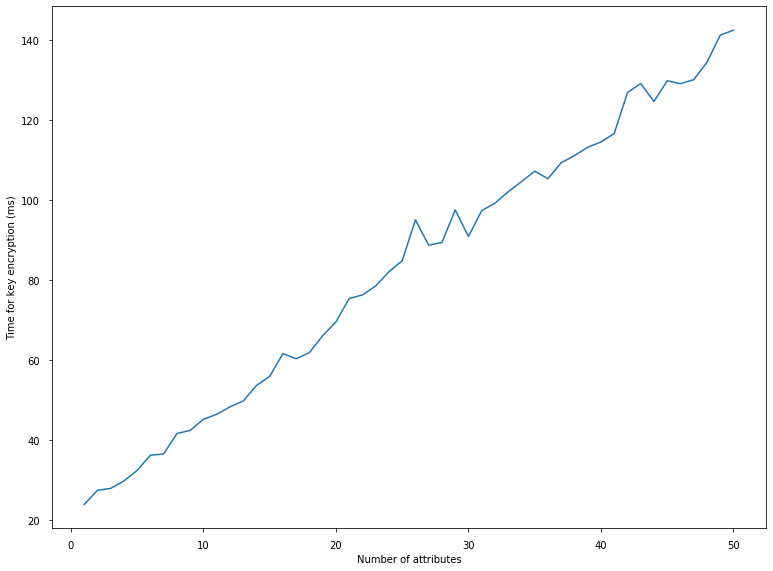

In [20]:
fig, ax = plt.subplots(figsize=[12.8, 9.6])

#plt.title('ABE secret key length by number of attributes  (attr length = 10 characters)')
plt.xlabel('Number of attributes')
plt.ylabel('Time for key encryption (ms)')

plt.plot(dec_df["attr"], dec_df["ms/op"])

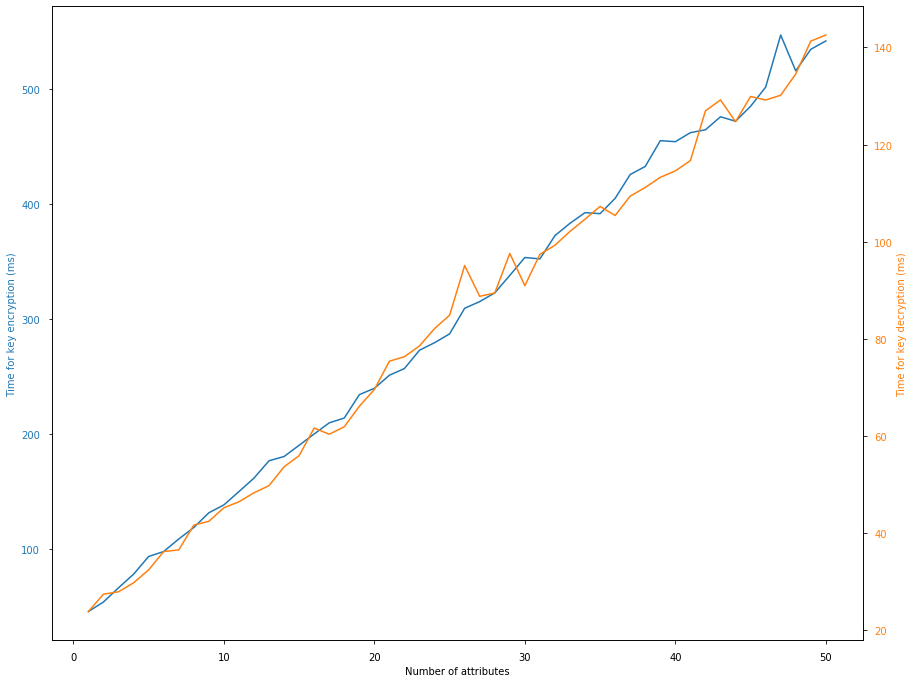

In [21]:
fig, ax1 = plt.subplots(figsize=[12.8, 9.6])

color = 'tab:blue'
ax1.set_xlabel('Number of attributes')
ax1.set_ylabel('Time for key encryption (ms)', color=color)
ax1.plot(enc_df["attr"], enc_df["ms/op"])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Time for key decryption (ms)', color=color)
ax2.plot(dec_df["attr"], dec_df["ms/op"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  

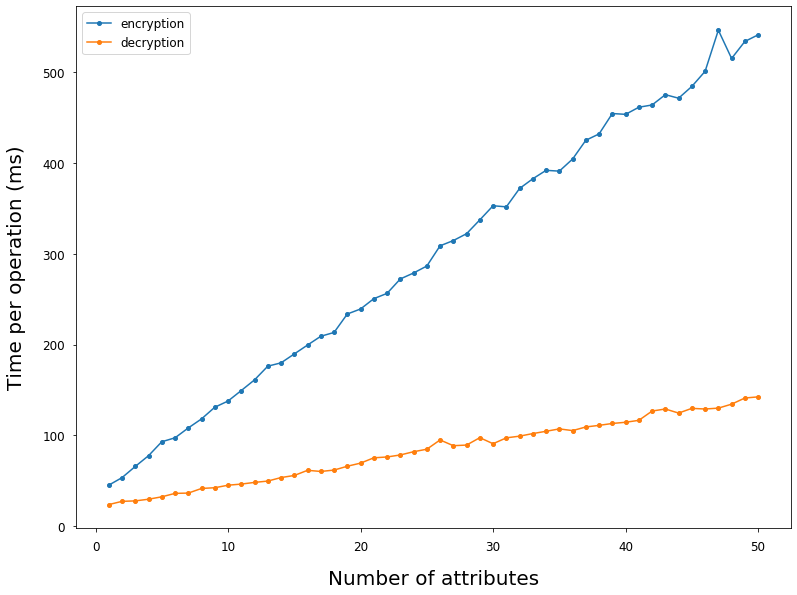

In [27]:
fig, ax1 = plt.subplots(figsize=[12.8, 9.6])

ax1.plot(enc_df["attr"], enc_df["ms/op"], marker='o', color='tab:blue', label="encryption", markersize=4)
ax1.plot(dec_df["attr"], dec_df["ms/op"], marker='o', color='tab:orange', label="decryption", markersize=4)
ax1.set_xlabel('Number of attributes', fontsize=20, labelpad=16)
ax1.set_ylabel('Time per operation (ms)', fontsize=20, labelpad=16)
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

#ax1.plot('x', 'y2', data=df, marker='', color='olive', linewidth=2)
#ax1.plot('x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend(loc=2, prop={'size': 12})


Links:
- http://codingberg.com/golang/interview/compute_parity_of_64_bit_unsigned_integer